In [ ]:
 """ Astaxanthin Adsorbance Spectrum to RGB

Usage:
======
    1. []
    2. 
"""

__authors__ = ("Simon-Martin Schröder", "Laure Vilgrain" )
__contact__ = ("sms@informatik.uni-kiel.de", "laure.vilgrain@imev-mer.fr")
__version__ = "1.0.0"
__date__ = "04-2021" 

# 1. Astaxanthin Adsorbance Spectrum to RGB

I use colour to convert the Astaxanthin Adsorbance Spectrum to an RGB value.

The Astaxanthin Adsorbance Spectrum comes from Rønsholdt und Mclean, „Determination of Total Carotenoid Content in Rainbow Trout Muscle by Multivariate Calibration of VIS Reflectance Spectra“. I used Engauge Digitizer Version 12.1 to trace the plot in the paper and generate the CSV.

In [1]:
import colour
import pandas as pd
from colour.plotting import plot_single_colour_swatch, ColourSwatch
import matplotlib.pyplot as plt

Here is a rough simplification: The spectrum of the incident light is a intensity curve depending on the wavelength 𝑖(𝜆). The responsivity of one specific sensor (R,G, or B) is a similar curve 𝑟(𝜆). The response of one channel (R,G, or B), is the integral over all wavelengths : \integralinf𝜆=−inf𝑟(𝜆)∗𝑖(𝜆)𝑑𝜆. (Actually, three color channels XYZ are used and then again translated to RGB. Also, the incident light spectrum also depends on the illumination.)

In [2]:
# Read csv
absorbance = pd.read_csv("data_emilia/Astaxanthin.csv", index_col=0).squeeze("columns")

In [3]:
absorbance

x
350.253    0.06726
362.568    0.06482
374.373    0.07758
386.693    0.09794
397.988    0.12590
407.745    0.16650
415.965    0.21470
423.158    0.26542
429.839    0.31867
435.494    0.37444
441.149    0.43021
446.804    0.48852
452.459    0.54682
458.114    0.60260
463.770    0.66090
469.938    0.71668
477.131    0.76740
486.376    0.81054
498.179    0.81316
507.922    0.77018
515.097    0.71957
518.170    0.68667
522.778    0.62844
527.386    0.56769
531.481    0.50946
535.575    0.44870
540.183    0.39047
544.277    0.32971
548.372    0.27148
552.980    0.21326
558.615    0.15504
566.816    0.10445
575.019    0.06145
579.633    0.03616
Name: Astaxanthin, dtype: float64

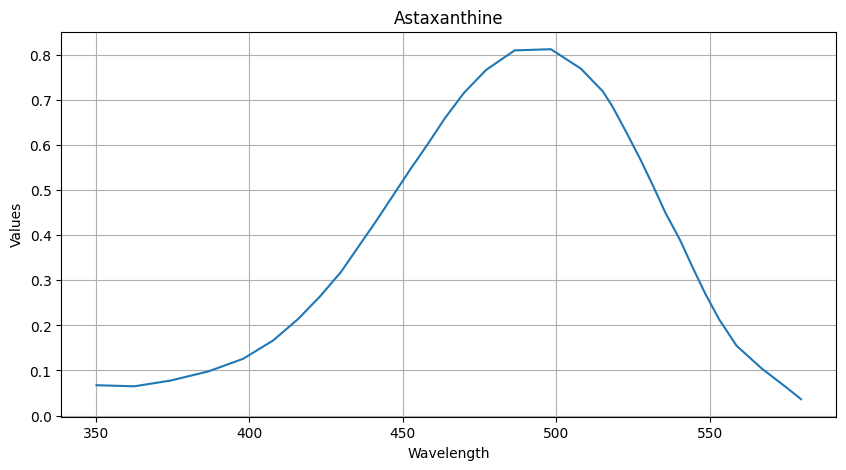

In [13]:

# Créer le graphique
plt.figure(figsize=(10, 5))           # taille du graphique (optionnel)
plt.plot(absorbance.index, absorbance.values)   # tracer la courbe
plt.title("Astaxanthine")    # titre du graphique
plt.xlabel("Wavelength")                   # label axe X
plt.ylabel("Values")                 # label axe Y
plt.grid(True)                        # afficher une grille (optionnel)
plt.show()                            # afficher le graphique

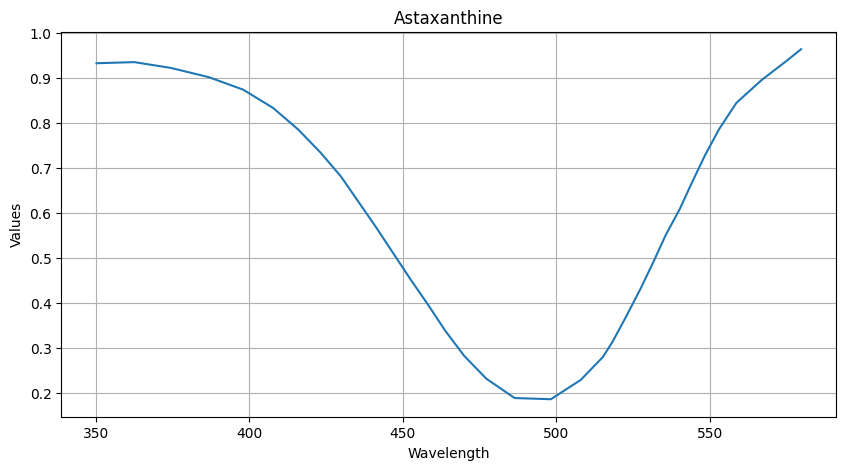

In [16]:
transmision = 1-absorbance
plt.figure(figsize=(10, 5))           # taille du graphique (optionnel)
plt.plot(transmision.index, transmision.values)   # tracer la courbe
plt.title("Astaxanthine")    # titre du graphique
plt.xlabel("Wavelength")                   # label axe X
plt.ylabel("Values")                 # label axe Y
plt.grid(True)                        # afficher une grille (optionnel)
plt.show()  

In [17]:
# Convert absorbance spectrum into reflectance Spectrum (1-x)
spectral_distrib = colour.SpectralDistribution((1-absorbance).to_dict(), name='Astaxanthin')

#to.dict transform the object in a dictionary with wevelength as keys and transmitance as values

In [20]:
spectral_distrib.interpolate(colour.SpectralShape(350, 580, 1))

SpectralDistribution([[  3.51000000e+02,   9.33554814e-01],
                      [  3.52000000e+02,   9.34491721e-01],
                      [  3.53000000e+02,   9.35258144e-01],
                      [  3.54000000e+02,   9.35860279e-01],
                      [  3.55000000e+02,   9.36304322e-01],
                      [  3.56000000e+02,   9.36596469e-01],
                      [  3.57000000e+02,   9.36742917e-01],
                      [  3.58000000e+02,   9.36749861e-01],
                      [  3.59000000e+02,   9.36623499e-01],
                      [  3.60000000e+02,   9.36370027e-01],
                      [  3.61000000e+02,   9.35995640e-01],
                      [  3.62000000e+02,   9.35506535e-01],
                      [  3.63000000e+02,   9.34908908e-01],
                      [  3.64000000e+02,   9.34208956e-01],
                      [  3.65000000e+02,   9.33412875e-01],
                      [  3.66000000e+02,   9.32526861e-01],
                      [  3.67000000e+02,

<Figure size 1000x500 with 0 Axes>

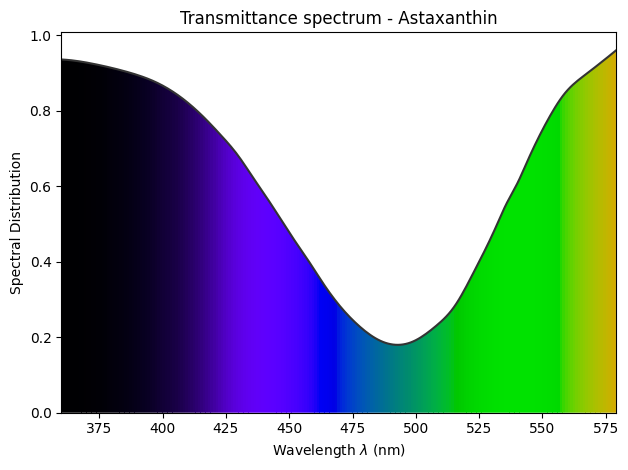

In [21]:
plt.figure(figsize=(10, 5))
colour.plotting.plot_single_sd(spectral_distrib, title='Transmittance spectrum - Astaxanthin')
plt.show()

In [23]:
# CMFS: Color Matching Functions
cmfs = colour.MSDS_CMFS['CIE 1964 10 Degree Standard Observer']
#illuminant
illuminant = colour.SDS_ILLUMINANTS['D65']

- Le CMF (Color Matching Function) est une fonction mathématique qui décrit comment l'œil humain perçoit les couleurs sous une source lumineuse donnée. CIE 1964 10 Degree Standard Observer est un standard scientifique qui décrit comment l'œil humain voit les couleurs sous un angle de vue de 10°. Cette référence est utilisée pour des calculs très précis en colorimétrie.
- Un illuminant est une source lumineuse standard utilisée pour mesurer et définir les couleurs. D65 est une lumière standard qui représente la lumière du jour moyenne, utilisée dans de nombreuses normes de couleur. Elle est souvent utilisée dans les calculs de couleur, notamment en photographie, dans les écrans et les sciences de la couleur. colour.SDS_ILLUMINANTS['D65'] te donne la distribution spectrale de la lumière D65, c’est-à-dire comment la lumière est distribuée en fonction des longueurs d'onde dans le spectre visible.

In [24]:
# Calculating the sample spectral distribution *CIE XYZ* tristimulus values.
XYZ = colour.sd_to_XYZ(spectral_distrib, cmfs, illuminant)
print(XYZ)

[ 77.82956338  67.05159658  50.61290516]


Cette fonction convertit une distribution spectrale (comme celle de ton spectral_distrib) en des valeurs XYZ.

XYZ est un espace de couleurs standardisé (tristimulus values) utilisé pour représenter les couleurs de manière objective. C’est une étape importante avant de pouvoir convertir ces valeurs en d'autres espaces de couleur comme RGB (ce que tu vois sur ton écran).

En gros, XYZ te donne une "mesure" de la couleur dans un espace théorique. C’est comme une coordonnée spatiale de la couleur, où la lumière est décrite par 3 valeurs (X, Y et Z). Ces valeurs sont déterminées en prenant en compte la réponse de l'œil humain (les CMFs) et la source lumineuse (l’illuminant).

In [29]:
RGB = colour.XYZ_to_sRGB(XYZ)

In [31]:
RGB /= RGB.max()
RGB

array([ 1.        ,  0.69690743,  0.64808983])

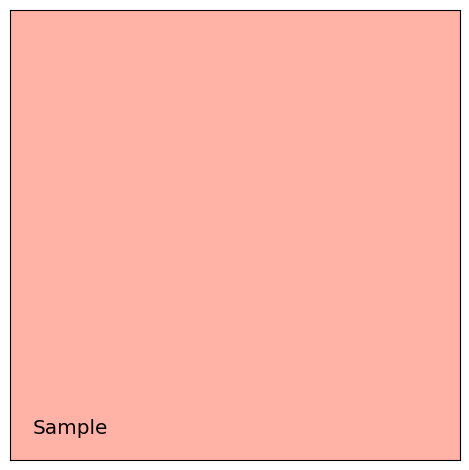

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [32]:
plot_single_colour_swatch(
    ColourSwatch(RGB, 'Sample'),
    text_kwargs={'size': 'x-large'})